Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).<br>
Check for null and unique values for test and train sets.<br>
Apply label encoder.<br>
Perform dimensionality reduction.<br>
Predict your test_df values using XGBoost.<br>

# Import necessary packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import  matplotlib.pyplot as  plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5)})
import xgboost as xgb
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 999
from scipy.stats  import shapiro

## Loading necessary Data

In [4]:
df_mer_train=pd.read_csv('train.csv')
df_mer_test=pd.read_csv('test.csv')
print(df_mer_train.shape,df_mer_test.shape)

(4209, 378) (4209, 377)


In [5]:
df_mer_train.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_mer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
df_mer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
df_mer_train['y'].describe()

count    4209.000000
mean     100.669318 
std      12.679381  
min      72.110000  
25%      90.820000  
50%      99.150000  
75%      109.010000 
max      265.320000 
Name: y, dtype: float64

1. shapiro wilk test:
    The Sample checked for Gaussion Distribution <br>
    H0 : Sample is Gaussion <br>
    HA : Sample is not Gaussion <br>

In [9]:
stat,p=shapiro(df_mer_train['y'])
print("Statistics :",stat,"p:",p)

alpha =0.05
if p > alpha:
    print("Sample look Gaussion(Fail To reject H0)")
else:
    print("Sample does not look Gaussion(Reject H0)")

Statistics : 0.93858402967453 p: 1.2467101604672783e-38
Sample does not look Gaussion(Reject H0)


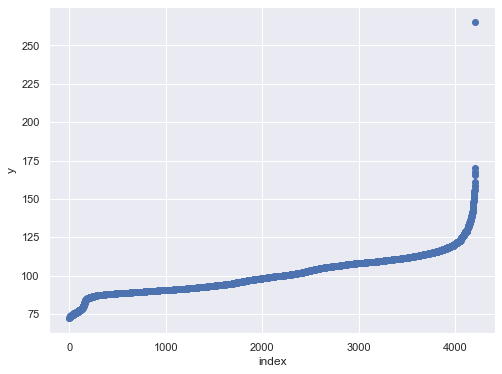

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_mer_train.shape[0]), np.sort(df_mer_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

## we clearly seen from the above picture there is an outlier

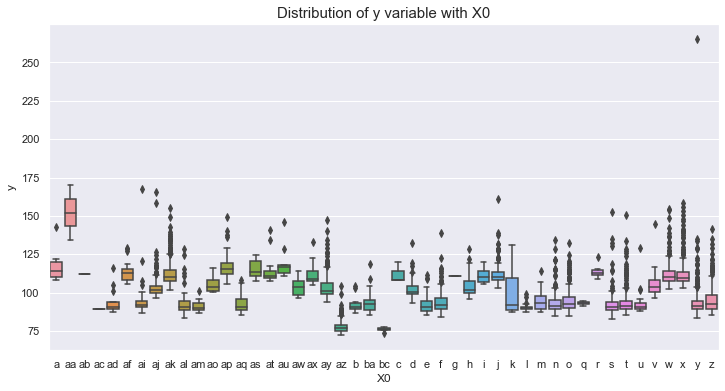

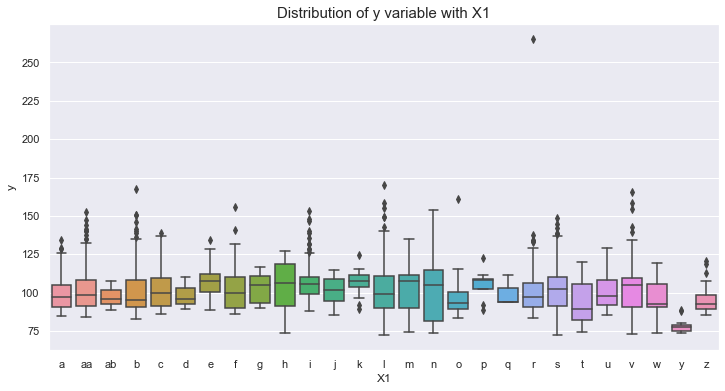

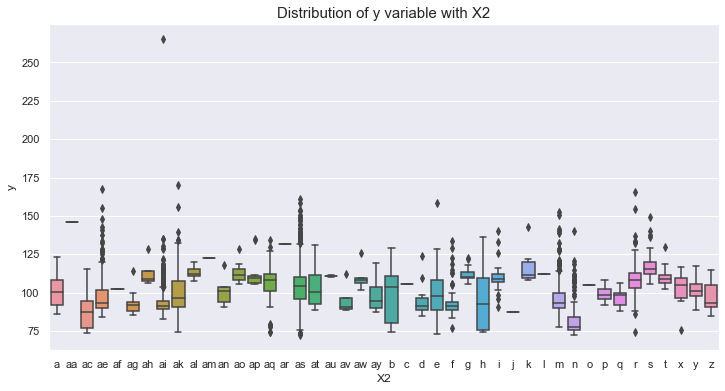

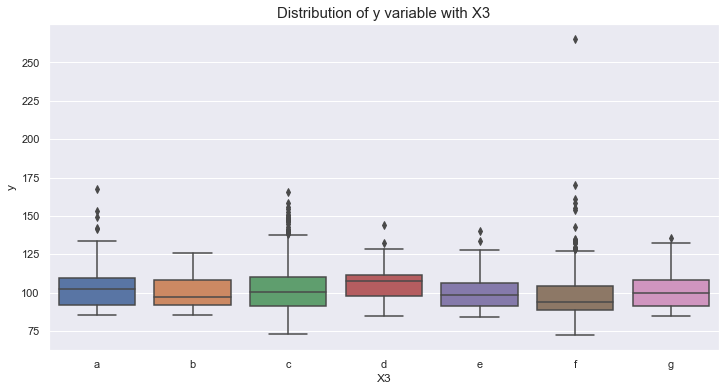

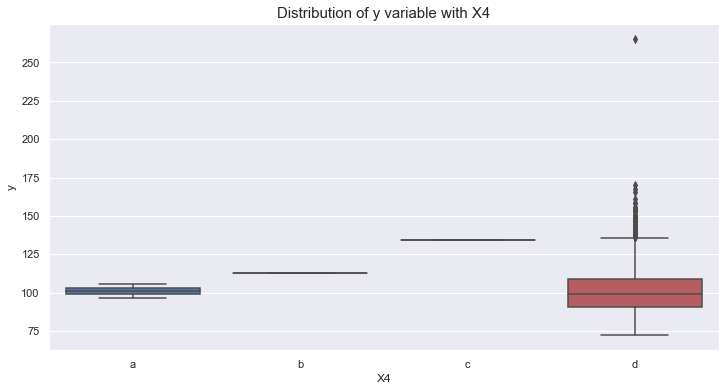

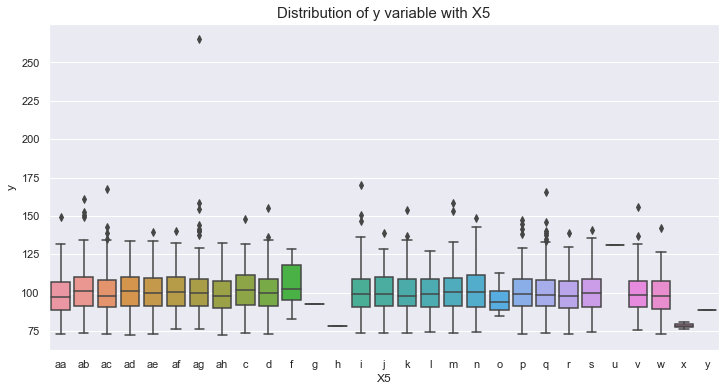

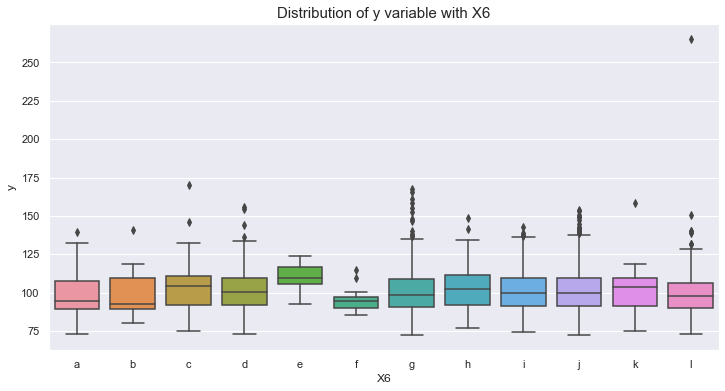

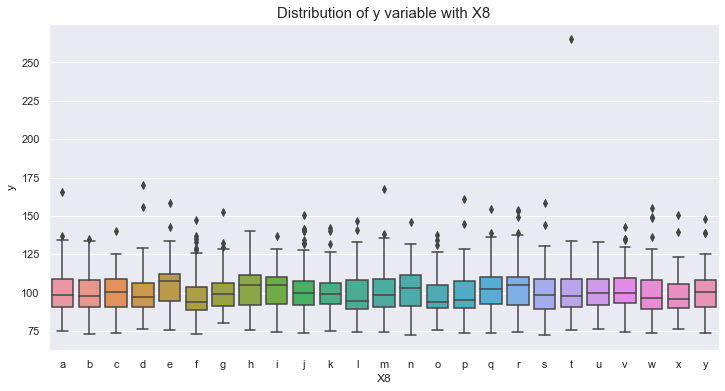

In [11]:
for cols in df_mer_train.select_dtypes('object'):
    col_order = np.sort(df_mer_train[cols].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=cols, y='y', data=df_mer_train, order=col_order)
    plt.xlabel(cols, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of y variable with "+cols, fontsize=15)
    plt.show()

## Checking the unique data in objects column

In [13]:
for cols in df_mer_train.select_dtypes('object'):
    print("-------------",cols,"-----------------")
    print("Total Unique:",len(df_mer_train[cols].unique()),'\n',df_mer_train[cols].unique())

------------- X0 -----------------
Total Unique: 47 
 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
------------- X1 -----------------
Total Unique: 27 
 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
------------- X2 -----------------
Total Unique: 44 
 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
------------- X3 -----------------
Total Unique: 7 
 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
------------- X4 -----------------
Total Unique: 4 
 ['d' 'b' 'c' 'a']
------------- X5 -----------------
Total Unique: 29 
 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' '

In [14]:
for cols in df_mer_test.select_dtypes('object'):
    print("-------------",cols,"-----------------")
    print("Total Unique:",len(df_mer_test[cols].unique()),'\n',df_mer_test[cols].unique())

------------- X0 -----------------
Total Unique: 49 
 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
------------- X1 -----------------
Total Unique: 27 
 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
------------- X2 -----------------
Total Unique: 45 
 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
------------- X3 -----------------
Total Unique: 7 
 ['f' 'a' 'c' 'e' 'd' 'g' 'b']
------------- X4 -----------------
Total Unique: 4 
 ['d' 'b' 'a' 'c']
------------- X5 -----------------
Total Unique: 32 
 ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' '

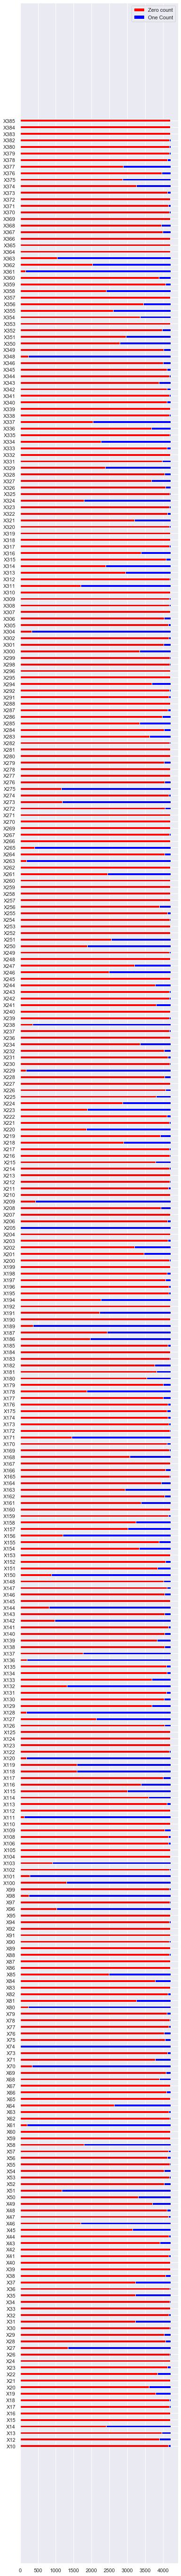

In [15]:
unique_values_dict = {}
for col in df_mer_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_mer_train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]

zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((df_mer_train[col]==0).sum())
    one_count_list.append((df_mer_train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

# Checking the null value of columns

In [16]:
temp_null_check =df_mer_train.isnull().sum().reset_index()
nullcolummns =temp_null_check[temp_null_check[0] >0]
nullcolummns

,index,0


In [17]:
temp_null_check =df_mer_test.isnull().sum().reset_index()
nullcolummns =temp_null_check[temp_null_check[0] >0]
nullcolummns

,index,0


# Applying label encoding :

In [18]:
 #Apply Label Encoding
for c in df_mer_train.columns:
    if df_mer_train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_mer_train[c].values) + list(df_mer_test[c].values))
        df_lbl = lbl.transform(list(df_mer_train[c].values))
        df_mer_test[c] = lbl.transform(list(df_mer_test[c].values))
        df_mer_train[c] = lbl.transform(list(df_mer_train[c].values))


In [19]:
df_mer_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


# As we are seeing all the variable is binary or categorical we can skip PCA

In [20]:
'''
n_comp=20
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(df_mer_train.drop(["y"], axis=1))
pca2_results_test = pca.transform(df_mer_test)
pca2_results_train
'''

'\nn_comp=20\npca = PCA(n_components=n_comp, random_state=420)\npca2_results_train = pca.fit_transform(df_mer_train.drop(["y"], axis=1))\npca2_results_test = pca.transform(df_mer_test)\npca2_results_train\n'

# Applying XGBoost with Trainset

In [21]:
train_y = df_mer_train.y.values
train_x = df_mer_train.drop(["y"],axis=1)
train_x = train_x.drop(["ID"],axis=1)
train_x = train_x.values

In [22]:
params = {'n_estimators': 1500, 
          'max_depth': 10, 
          'min_samples_split': 2, 
          'learning_rate': 0.005, 
          'loss': 'ls', 
          'eval_metric': 'mae', 
          'min_child_weight': 6, 
          'subsample': 0.8, 
          'colsample_bytree': 1, 
          'eta': 0.005}

In [23]:
%%time
bst = xgb.XGBRegressor(**params).fit(train_x, train_y)
preds = bst.predict(train_x) 


[09:50:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 2min 52s


In [24]:
print("--------------------------------Model Accuracy---------------------------")
print("Training Data")
print("Means Absolute Error:",mean_absolute_error(preds,train_y))
print("Means sq Error:",mean_squared_error(preds,train_y))
print("square Root Means Absolute Error:",np.sqrt(mean_squared_error(preds,train_y)))
print("R2 value :",r2_score(preds,train_y))

--------------------------------Model Accuracy---------------------------
Training Data
Means Absolute Error: 3.5469570044084526
Means sq Error: 31.898433285547718
square Root Means Absolute Error: 5.6478698006901435
R2 value : 0.6928414125758667


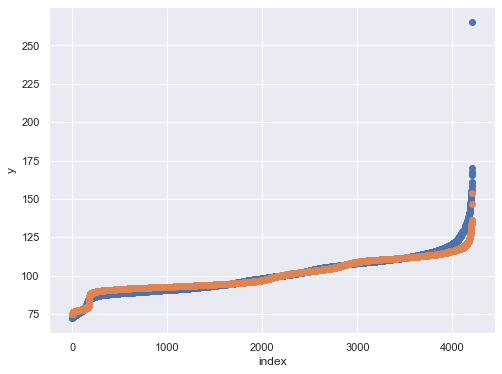

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_mer_train.shape[0]), np.sort(df_mer_train.y.values))
plt.scatter(range(df_mer_train.shape[0]), np.sort(preds))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()